In [0]:
from sklearn.datasets import load_wine
wine = load_wine()

In [0]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [0]:
wine.data.shape

(178, 13)

In [0]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [0]:
for data, target in zip(wine.data[:100], wine.target[:100]):
  print(data, target)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] 0
[1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03] 0
[1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
 3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03] 0
[1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
 2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03] 0
[1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
 3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02] 0
[1.42e+01 1.76e+00 2.45e+00 1.52e+01 1.12e+02 3.27e+00 3.39e+00 3.40e-01
 1.97e+00 6.75e+00 1.05e+00 2.85e+00 1.45e+03] 0
[1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
 3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03] 0
[1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
 3.100e-01

In [0]:
import pandas as pd

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "class_0"
df.loc[df['target'] == 1, 'target'] = "class_1"
df.loc[df['target'] == 2, 'target'] = "class_2"
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


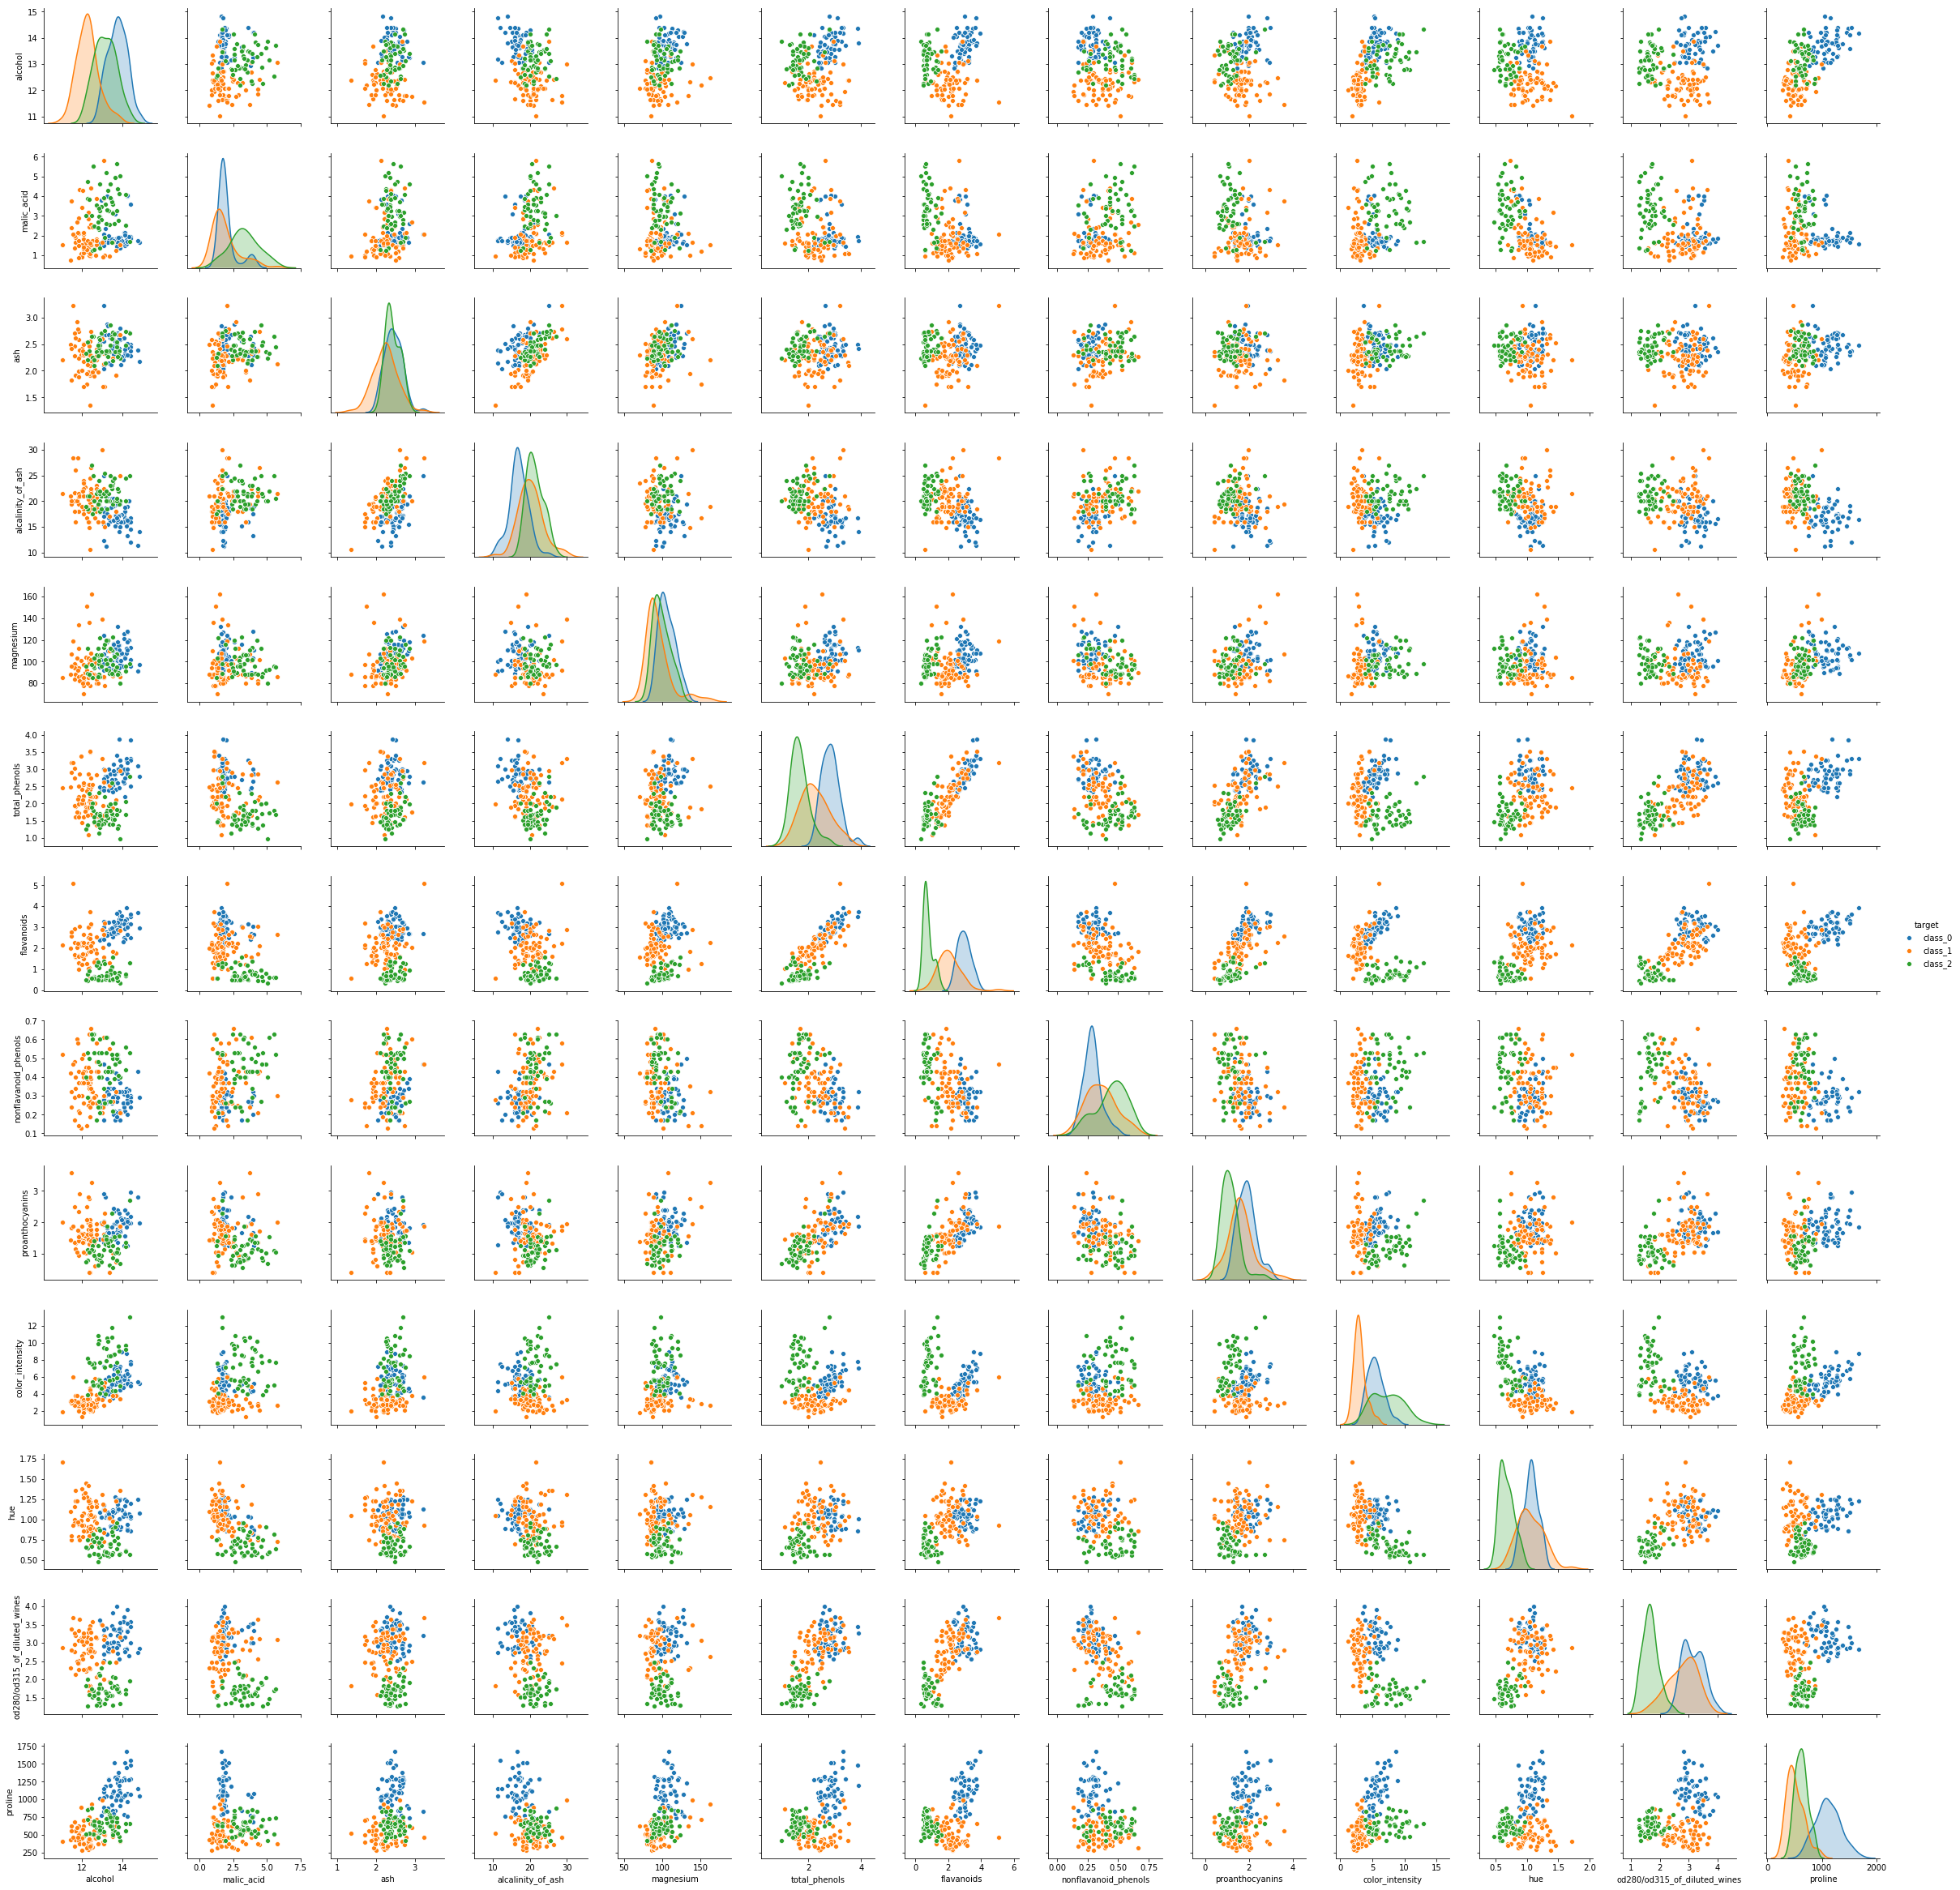

In [0]:
import seaborn as sns
# JupyterLab で実行する際は、この行を書くことで描画できるようになります。
%matplotlib inline

sns.pairplot(df, hue="target")

In [0]:
# import some data to play with
X = wine.data[:, [0, 2]] 
y = wine.target

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# graph common settings
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def decision_boundary(clf, X, y, ax, title):
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # label
    ax.set_title(title)
    ax.set_xlabel('sepal length')
    ax.set_ylabel('petal length')


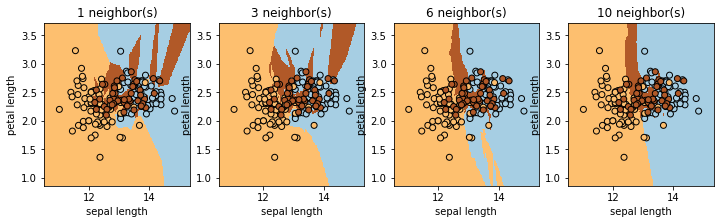

In [0]:
from sklearn.neighbors import KNeighborsClassifier

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for ax, n_neighbors in zip(axes, [1, 3, 6, 10]):
    title = "%s neighbor(s)"% (n_neighbors)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    decision_boundary(clf, X, y, ax, title)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

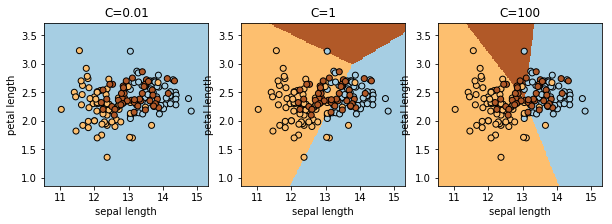

In [0]:
from sklearn.linear_model import LogisticRegression

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for ax, C in zip(axes, [0.01, 1, 100]):
    title = "C=%s"% (C)
    clf = LogisticRegression(C=C)
    decision_boundary(clf, X, y, ax, title)